In [1]:
import numpy as np
import seaborn as sns
import nsfg

In [2]:
df = nsfg.ReadFemPreg()
nsfg.CleanFemPreg(df)

(1    9148
 2    1862
 3     120
 4    1921
 5     190
 6     352
 Name: outcome, dtype: int64,
 <seaborn.axisgrid.FacetGrid at 0x7fab39d8a7f0>)

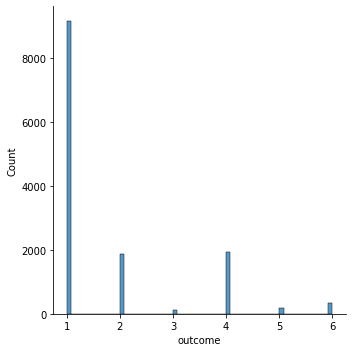

In [3]:
df.outcome.value_counts().sort_index(), sns.displot(df.outcome)

In [4]:
type(df.outcome.value_counts())

pandas.core.series.Series

In [5]:
# Transform to kg
df['birth_wgt_kg'] = df['birthwgt_lb'] * 0.453592

(0        3.628736
 1        3.175144
 2        4.082328
 3        3.175144
 4        2.721552
            ...   
 13588    2.721552
 13589         NaN
 13590         NaN
 13591    3.175144
 13592    3.175144
 Name: birth_wgt_kg, Length: 13593, dtype: float64,
 <seaborn.axisgrid.FacetGrid at 0x7fab39cc9a90>)

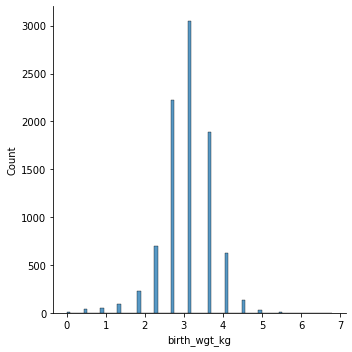

In [6]:
df['birth_wgt_kg'], sns.displot(df['birth_wgt_kg'])

In [7]:
df['birthwgt_lb']

0        8.0
1        7.0
2        9.0
3        7.0
4        6.0
        ... 
13588    6.0
13589    NaN
13590    NaN
13591    7.0
13592    7.0
Name: birthwgt_lb, Length: 13593, dtype: float64

In [8]:

df.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt', 'finalwgt',
       'secu_p', 'sest', 'cmintvw', 'totalwgt_lb', 'birth_wgt_kg'],
      dtype='object', length=245)

In [9]:
# int duration of preganancy in weeks
df.prglngth

0        39
1        39
2        39
3        39
4        39
         ..
13588    39
13589     6
13590     5
13591    39
13592    39
Name: prglngth, Length: 13593, dtype: int64

(count    13593.000000
 mean        29.531229
 std         13.802523
 min          0.000000
 25%         13.000000
 50%         39.000000
 75%         39.000000
 max         50.000000
 Name: prglngth, dtype: float64,
 <seaborn.axisgrid.FacetGrid at 0x7fab39ca6370>)

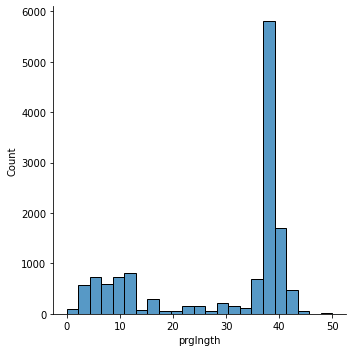

In [10]:
df['prglngth'].describe(), sns.displot(df['prglngth'])

In [13]:
pregmap = nsfg.MakePregMap(df)
caseid = df['caseid'].values

In [16]:
# find the pregnancy length of the first one
firstbabies_status = []
first_idxes = []
for id in caseid:
    ix = pregmap[id][0]
    first_idxes.append(ix)
    
# make unique idx
first_idxes = list(set(first_idxes))


<AxesSubplot:xlabel='prglngth', ylabel='Count'>

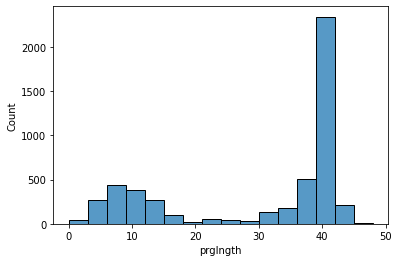

In [29]:
prglngth_first_birth_all = df.iloc[first_idxes,:]['prglngth']
sns.histplot(prglngth_first_birth_all)

<ipython-input-35-b8b0bba52c58>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prglngth_first_birth_live = df.iloc[first_idxes,:][df['outcome'] == 1]['prglngth']


<AxesSubplot:xlabel='prglngth', ylabel='Count'>

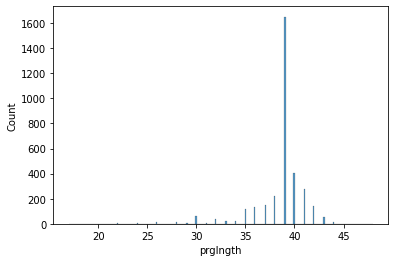

In [35]:
prglngth_first_birth_live = df.iloc[first_idxes,:][df['outcome'] == 1]['prglngth']
sns.histplot(prglngth_first_birth_live)